In [1]:
cov_type_var = 'HC3'

<br>

# Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/home/boturon/miniconda3/envs/gis/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<br>

# Functions

In [3]:
def gof_range(yhat):
    results = [0, 0]
    for i in yhat.values:
        if i < 0:
            results[0] += 1
        elif i > 1:
            results[1] += 1
    return("Values under 0: "+ str(round(100*results[0]/len(yhat.values),2))+"%."+"\n"+"Values over 1: "+ str(round(100*results[1]/len(yhat.values),2))+"%."+"\n"+"Values fucked up: "+ str(round(100*np.sum(results)/len(yhat.values),2))+"%.", np.sum(results)/len(yhat.values))

In [4]:
def gof_pcp(yhat):
    cpredicted = 0
    for index, i in enumerate(yhat.values):
        if i >= 0.5:
            if list(y)[index] == 1:
                cpredicted += 1
        else:
            if list(y)[index] == 0:
                cpredicted += 1
    pcpredicted = cpredicted/len(yhat)
    return("Percent Correctly Predicted: "+ str(round(100*pcpredicted, 2))+"%.", pcpredicted)

<br>

# Data

In [5]:
results_sofar = pd.DataFrame(index= ["R^2", "R^2 Adj.", "Out Range", "GoF", "n", "variables"]) 

In [6]:
data = pd.read_csv("./data_all.csv", index_col=0)

In [7]:
y = data.init_vote_result.copy()

In [9]:
y.describe()

count    7749.000000
mean        0.577623
std         0.493970
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: init_vote_result, dtype: float64

## Specific regression

In [8]:
data_pro_res = data[data.init_type == "Projeto de Resolução"].copy()
data_pro_law = data[data.init_type == "Projeto de Lei"].copy()
y_pro_res = data_pro_res.init_vote_result.copy()
y_pro_law = data_pro_law.init_vote_result.copy()

<br>

> # Model 00

In [9]:
list_col_00 = ["count_events", "count_past_votes",
               "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_BE", 
               "yr_1992", "yr_1993", "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999",
               "yr_2000", "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
               "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", 
               "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [10]:
data_00 = sm.add_constant(data[list_col_00])
X_00 = data_00
model_00 = sm.OLS(y,X_00)
results_00 = model_00.fit()
results_00.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        22:55:49   Log-Likelihood:                -4502.0
No. Observations:                7749   AIC:                             9070.
Df Residuals:                    7716   BIC:                             9300.
Df Model:                          32                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9064      0.090     10.061      0.000       0.730       1.083
count_events        -0.0421      0.003    -13.136      0.000      -0.048      -0.036
count_past_votes     0.1686      0.005     31.051      0.000       0.158       0.179
maj_abs             -0.3726      0.057     -6.566      0.000      -0.484      -0.261
coal                 0.0241      0.063      0.380      0.704      -0.100       0.149
gov_PSD              0.3919      0.163      2.410      0.016       0.073       0.711
gov_CDS             -0.3643      0.109     -3.344      0.001      -0.578      -0.151
gov_BE               0.3884      0.085      4.543      0.000       0.221       0.556
yr_1992             -0.5327      0.178     -2.989      0.003      -0.882      -0.183
yr_1993             -0.3735      0.173     -2.158      0.031      -0.713      -0.034
yr_1994             -0.4196      0.176     -2.380      0.017      -0.765      -0.074
yr_1995             -0.1928      0.168     -1.145      0.252      -0.523       0.137
yr_1996             -0.1240      0.099     -1.253      0.210      -0.318       0.070
yr_1997             -0.1518      0.094     -1.619      0.106      -0.336       0.032
yr_1998             -0.2553      0.098     -2.609      0.009      -0.447      -0.063
yr_1999             -0.1775      0.094     -1.887      0.059      -0.362       0.007
yr_2000             -0.2880      0.098     -2.940      0.003      -0.480      -0.096
yr_2001             -0.1562      0.093     -1.681      0.093      -0.338       0.026
yr_2002              0.1610      0.093      1.739      0.082      -0.021       0.343
yr_2003              0.0808      0.084      0.957      0.339      -0.085       0.246
yr_2004              0.0679      0.086      0.787      0.432      -0.101       0.237
yr_2005              0.1517      0.113      1.342      0.180      -0.070       0.373
yr_2006              0.0118      0.111      0.107      0.915      -0.206       0.230
yr_2007              0.0134      0.111      0.121      0.904      -0.205       0.232
yr_2008             -0.0555      0.110     -0.507      0.613      -0.270       0.159
yr_2009             -0.0752      0.104     -0.724      0.469      -0.279       0.128
yr_2010             -0.2156      0.092     -2.336      0.020      -0.397      -0.035
yr_2011             -0.2238      0.087     -2.585      0.010      -0.393      -0.054
yr_2012             -0.1885      0.083     -2.270      0.023      -0.351      -0.026
yr_2013             -0.1009      0.083     -1.212      0.225      -0.264       0.062
yr_2014             -0.0929      0.084     -1.111      0.267      -0.257       0.071
yr_2015             -0.0334      0.079     -0.423      0.672      -0.188       0.121
yr_2016             -0.1591      0.031     -5.142      0.000      -0.220      -0.098
yr_2017             -0.

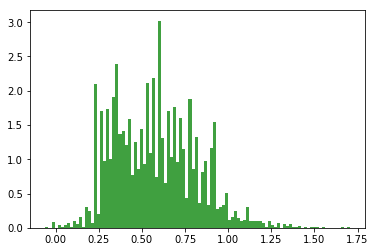

In [11]:
yhat_00 = results_00.predict(X_00);
plt.hist(yhat_00, 100, density=1, facecolor='green', alpha=0.75);

In [12]:
print(gof_range(yhat_00)[0])

Values under 0: 0.18%.
Values over 1: 3.79%.
Values fucked up: 3.97%.


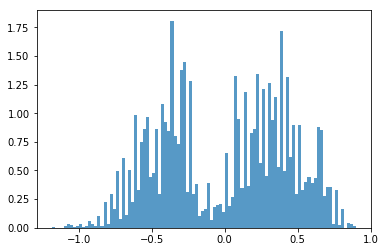

In [13]:
plt.hist(y-yhat_00, 100, density=1, alpha=0.75);

In [14]:
print(gof_pcp(yhat_00)[0])

Percent Correctly Predicted: 71.85%.


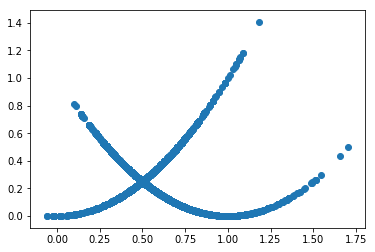

In [15]:
plt.scatter(yhat_00.values, (y.values - yhat_00.values)**2 );

In [16]:
results_sofar["00"] = [results_00.rsquared, results_00.rsquared_adj, gof_range(yhat_00)[1], gof_pcp(yhat_00)[1], len(yhat_00), len(list_col_00)]
results_sofar

00
R^2           0.232966
R^2 Adj.      0.229785
Out Range     0.039747
GoF           0.718544
n          7749.000000
variables    33.000000

<br>

> # Model 01

In [17]:
list_col_01 = ["count_events", "count_past_votes", "comi_mean", "leg_mean",
               "share_PSD", "share_CDS", "share_BE", "share_PEV", 
               "share_PCP", "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_BE", 
               "yr_1992", "yr_1993", "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999",
               "yr_2000", "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
               "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", 
               "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [18]:
data_01 = sm.add_constant(data[list_col_01])
X_01 = data_01
model_01 = sm.OLS(y,X_01)
results_01 = model_01.fit()
results_01.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     126.3
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        22:55:53   Log-Likelihood:                -4234.6
No. Observations:                7749   AIC:                             8549.
Df Residuals:                    7709   BIC:                             8828.
Df Model:                          39                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1582      0.096     12.082      0.000       0.970       1.346
count_events        -0.0420      0.003    -13.606      0.000      -0.048      -0.036
count_past_votes     0.1569      0.005     29.350      0.000       0.146       0.167
comi_mean           -0.1115      0.013     -8.802      0.000      -0.136      -0.087
leg_mean             0.0335      0.008      4.068      0.000       0.017       0.050
share_PSD            0.0557      0.016      3.423      0.001       0.024       0.088
share_CDS           -0.0484      0.019     -2.487      0.013      -0.086      -0.010
share_BE            -0.2603      0.016    -16.093      0.000      -0.292      -0.229
share_PEV            0.0348      0.032      1.072      0.284      -0.029       0.099
share_PCP           -0.1434      0.016     -9.136      0.000      -0.174      -0.113
maj_abs             -0.4028      0.055     -7.322      0.000      -0.511      -0.295
coal                 0.1440      0.059      2.433      0.015       0.028       0.260
gov_PSD              0.3163      0.147      2.147      0.032       0.028       0.605
gov_CDS             -0.2651      0.100     -2.651      0.008      -0.461      -0.069
gov_BE               0.4091      0.084      4.846      0.000       0.244       0.575
yr_1992             -0.5571      0.166     -3.360      0.001      -0.882      -0.232
yr_1993             -0.4020      0.160     -2.505      0.012      -0.717      -0.087
yr_1994             -0.4403      0.164     -2.685      0.007      -0.762      -0.119
yr_1995             -0.2371      0.156     -1.517      0.129      -0.543       0.069
yr_1996             -0.1955      0.103     -1.899      0.058      -0.397       0.006
yr_1997             -0.2366      0.097     -2.430      0.015      -0.428      -0.046
yr_1998             -0.3427      0.102     -3.373      0.001      -0.542      -0.144
yr_1999             -0.2638      0.098     -2.698      0.007      -0.455      -0.072
yr_2000             -0.3206      0.102     -3.156      0.002      -0.520      -0.121
yr_2001             -0.2122      0.097     -2.196      0.028      -0.402      -0.023
yr_2002              0.1226      0.097      1.258      0.208      -0.068       0.314
yr_2003              0.0113      0.089      0.127      0.899      -0.164       0.186
yr_2004             -0.0204      0.091     -0.224      0.822      -0.199       0.158
yr_2005              0.2630      0.114      2.297      0.022       0.039       0.487
yr_2006              0.1102      0.113      0.975      0.330      -0.111       0.332
yr_2007              0.1156      0.113      1.022      0.307      -0.106       0.337
yr_2008              0.0303      0.111      0.272      0.786      -0.188       0.248
yr_2009              0.0058      0.106      0.054      0.957      -0.202       0.214
yr_2010             -0.

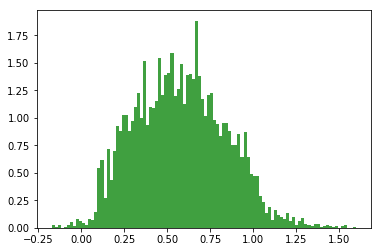

In [19]:
yhat_01 = results_01.predict(X_01);
plt.hist(yhat_01, 100, density=1, facecolor='green', alpha=0.75);

In [20]:
print(gof_range(yhat_01)[0])

Values under 0: 0.43%.
Values over 1: 5.33%.
Values fucked up: 5.76%.


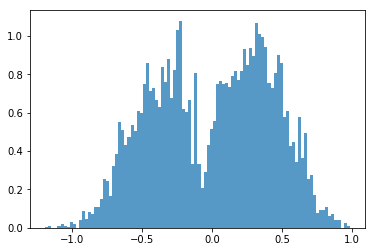

In [21]:
plt.hist(y-yhat_01, 100, density=1, alpha=0.75);

In [22]:
print(gof_pcp(yhat_01)[0])

Percent Correctly Predicted: 74.68%.


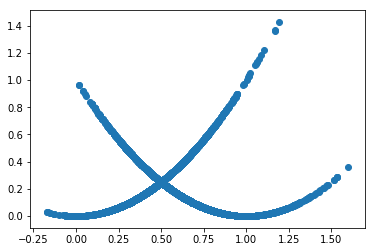

In [23]:
plt.scatter(yhat_01.values, (y.values - yhat_01.values)**2 );

In [24]:
results_sofar["01"] = [results_01.rsquared, results_01.rsquared_adj, gof_range(yhat_01)[1], gof_pcp(yhat_01)[1], len(yhat_01), len(list_col_01)]
results_sofar

00           01
R^2           0.232966     0.284113
R^2 Adj.      0.229785     0.280492
Out Range     0.039747     0.057556
GoF           0.718544     0.746806
n          7749.000000  7749.000000
variables    33.000000    40.000000

<br>

> # Model 02

In [25]:
list_col_02 = ["count_events", "count_past_votes", "HHI_age", 
               "comi_mean", "leg_mean", "share_age_2029", "share_age_3039", 
               "share_age_5059", "share_age_6069", "share_age_7079", "share_PSD",
               "share_CDS", "share_BE", "share_PEV", "share_PCP", "share_women", 
               "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", 
               "yr_1993", "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998", 
               "yr_1999", "yr_2000", "yr_2001", "yr_2002", "yr_2003", "yr_2004", 
               "yr_2005", "yr_2006", "yr_2007", "yr_2008", "yr_2009", "yr_2010", 
               "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", "yr_2016", 
               "yr_2017"]

In [26]:
data_02 = sm.add_constant(data[list_col_02])
y_02 = data.init_vote_result
X_02 = data_02
model_02 = sm.OLS(y,X_02)
results_02 = model_02.fit()
results_02.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     106.4
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        22:55:57   Log-Likelihood:                -4219.0
No. Observations:                7749   AIC:                             8532.
Df Residuals:                    7702   BIC:                             8859.
Df Model:                          46                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1439      0.100     11.441      0.000       0.948       1.340
count_events        -0.0417      0.003    -13.549      0.000      -0.048      -0.036
count_past_votes     0.1560      0.005     29.106      0.000       0.145       0.167
HHI_age             -0.0145      0.028     -0.517      0.605      -0.069       0.040
comi_mean           -0.0937      0.014     -6.859      0.000      -0.120      -0.067
leg_mean             0.0131      0.009      1.407      0.160      -0.005       0.031
share_age_2029      -0.2101      0.066     -3.184      0.001      -0.340      -0.081
share_age_3039      -0.0634      0.028     -2.302      0.021      -0.117      -0.009
share_age_5059      -0.0078      0.027     -0.294      0.769      -0.060       0.044
share_age_6069       0.0683      0.049      1.400      0.162      -0.027       0.164
share_age_7079       0.4303      0.106      4.058      0.000       0.222       0.638
share_PSD            0.0672      0.017      3.990      0.000       0.034       0.100
share_CDS           -0.0404      0.020     -1.979      0.048      -0.080      -0.000
share_BE            -0.2562      0.017    -14.766      0.000      -0.290      -0.222
share_PEV            0.0543      0.036      1.527      0.127      -0.015       0.124
share_PCP           -0.1172      0.017     -6.717      0.000      -0.151      -0.083
share_women         -0.0121      0.029     -0.413      0.680      -0.069       0.045
maj_abs             -0.4184      0.055     -7.575      0.000      -0.527      -0.310
coal                 0.1536      0.060      2.561      0.010       0.036       0.271
gov_PSD              0.3247      0.149      2.183      0.029       0.033       0.616
gov_CDS             -0.2651      0.101     -2.626      0.009      -0.463      -0.067
gov_BE               0.4187      0.085      4.931      0.000       0.252       0.585
yr_1992             -0.5061      0.168     -3.009      0.003      -0.836      -0.176
yr_1993             -0.3441      0.163     -2.111      0.035      -0.664      -0.025
yr_1994             -0.4054      0.167     -2.434      0.015      -0.732      -0.079
yr_1995             -0.1887      0.159     -1.190      0.234      -0.500       0.122
yr_1996             -0.1418      0.104     -1.360      0.174      -0.346       0.063
yr_1997             -0.1919      0.098     -1.948      0.051      -0.385       0.001
yr_1998             -0.3033      0.103     -2.956      0.003      -0.504      -0.102
yr_1999             -0.2383      0.099     -2.411      0.016      -0.432      -0.045
yr_2000             -0.2861      0.103     -2.791      0.005      -0.487      -0.085
yr_2001             -0.1781      0.098     -1.822      0.069      -0.370       0.014
yr_2002              0.1546      0.098      1.570      0.116      -0.038       0.348
yr_2003              0.

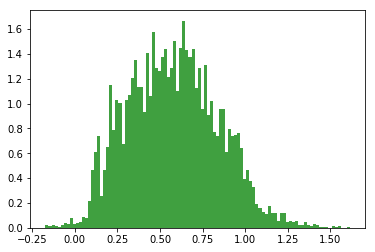

In [27]:
yhat_02 = results_02.predict(X_02);
plt.hist(yhat_02, 100, density=1, facecolor='green', alpha=0.75);

In [28]:
print(gof_range(yhat_02)[0])

Values under 0: 0.46%.
Values over 1: 5.47%.
Values fucked up: 5.94%.


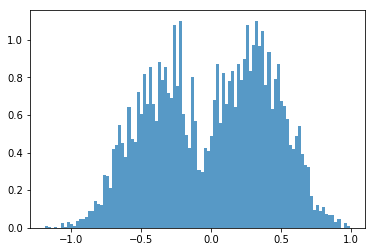

In [29]:
plt.hist(y-yhat_02, 100, density=1, alpha=0.75);

In [30]:
print(gof_pcp(yhat_02)[0])

Percent Correctly Predicted: 74.63%.


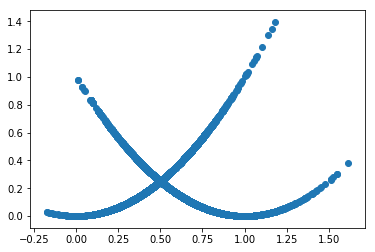

In [31]:
plt.scatter(yhat_02.values, (y.values - yhat_02.values)**2 );

In [32]:
results_sofar["02"] = [results_02.rsquared, results_02.rsquared_adj, gof_range(yhat_02)[1], gof_pcp(yhat_02)[1], len(yhat_02), len(list_col_02)]
results_sofar

00           01           02
R^2           0.232966     0.284113     0.286992
R^2 Adj.      0.229785     0.280492     0.282733
Out Range     0.039747     0.057556     0.059362
GoF           0.718544     0.746806     0.746290
n          7749.000000  7749.000000  7749.000000
variables    33.000000    40.000000    47.000000

<br>

> # Model 03

In [33]:
list_col_03 = ["count_events", "count_past_votes", "HHI_age", "comi_mean", "leg_mean", 
                 "share_age_2029", "share_age_3039", "share_age_5059", "share_age_6069", 
                 "share_age_7079", "share_PSD", "share_CDS", "share_BE", "share_PEV", 
                 "share_PCP", "share_opp_party", "maj_abs", "coal", "gov_PSD",
                 "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994", "yr_1995", "yr_1996",
                 "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001", "yr_2002", "yr_2003", 
                 "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008", "yr_2009", "yr_2010", 
                 "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [34]:
data_03 = sm.add_constant(data[list_col_03])
y_03 = data.init_vote_result
X_03 = data_03
model_03 = sm.OLS(y,X_03)
results_03 = model_03.fit()
results_03.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        22:56:01   Log-Likelihood:                -3927.1
No. Observations:                7749   AIC:                             7948.
Df Residuals:                    7702   BIC:                             8275.
Df Model:                          46                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3493      0.082     16.367      0.000       1.188       1.511
count_events        -0.0396      0.003    -13.466      0.000      -0.045      -0.034
count_past_votes     0.1396      0.005     26.980      0.000       0.129       0.150
HHI_age              0.0624      0.027      2.304      0.021       0.009       0.115
comi_mean           -0.0971      0.013     -7.567      0.000      -0.122      -0.072
leg_mean             0.0345      0.009      3.872      0.000       0.017       0.052
share_age_2029      -0.1855      0.065     -2.841      0.005      -0.314      -0.058
share_age_3039      -0.1083      0.026     -4.113      0.000      -0.160      -0.057
share_age_5059       0.0210      0.025      0.828      0.408      -0.029       0.071
share_age_6069       0.0561      0.048      1.177      0.239      -0.037       0.149
share_age_7079      -0.0208      0.091     -0.229      0.819      -0.199       0.158
share_PSD            0.1082      0.015      7.061      0.000       0.078       0.138
share_CDS            0.0848      0.019      4.354      0.000       0.047       0.123
share_BE            -0.1548      0.017     -9.080      0.000      -0.188      -0.121
share_PEV            0.0669      0.033      2.056      0.040       0.003       0.131
share_PCP           -0.0242      0.017     -1.399      0.162      -0.058       0.010
share_opp_party     -0.3371      0.012    -29.136      0.000      -0.360      -0.314
maj_abs             -0.4212      0.054     -7.752      0.000      -0.528      -0.315
coal                 0.0549      0.054      1.018      0.309      -0.051       0.161
gov_PSD              0.3668      0.137      2.671      0.008       0.098       0.636
gov_CDS             -0.2326      0.091     -2.550      0.011      -0.411      -0.054
gov_BE               0.2875      0.074      3.890      0.000       0.143       0.432
yr_1992             -0.5706      0.149     -3.836      0.000      -0.862      -0.279
yr_1993             -0.4522      0.144     -3.130      0.002      -0.735      -0.169
yr_1994             -0.4704      0.147     -3.192      0.001      -0.759      -0.182
yr_1995             -0.3079      0.139     -2.209      0.027      -0.581      -0.035
yr_1996             -0.2120      0.088     -2.396      0.017      -0.385      -0.039
yr_1997             -0.2418      0.082     -2.961      0.003      -0.402      -0.082
yr_1998             -0.3320      0.087     -3.825      0.000      -0.502      -0.162
yr_1999             -0.2766      0.082     -3.375      0.001      -0.437      -0.116
yr_2000             -0.3299      0.086     -3.847      0.000      -0.498      -0.162
yr_2001             -0.2414      0.081     -2.990      0.003      -0.400      -0.083
yr_2002              0.1270      0.082      1.556      0.120      -0.033       0.287
yr_2003             -0.

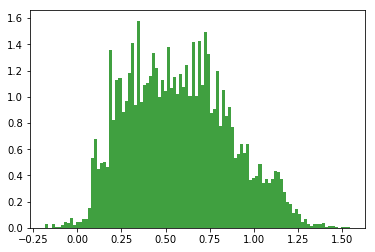

In [35]:
yhat_03 = results_03.predict(X_03);
plt.hist(yhat_03, 100, density=1, facecolor='green', alpha=0.75);

In [36]:
print(gof_range(yhat_03)[0])

Values under 0: 0.52%.
Values over 1: 8.92%.
Values fucked up: 9.43%.


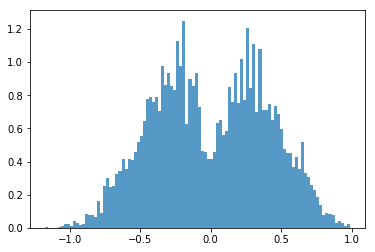

In [37]:
plt.hist(y-yhat_03, 100, density=1, alpha=0.75);

In [38]:
print(gof_pcp(yhat_03)[0])

Percent Correctly Predicted: 77.67%.


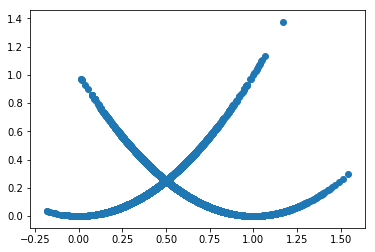

In [39]:
plt.scatter(yhat_03.values, (y.values - yhat_03.values)**2 );

In [40]:
results_sofar["03"] = [results_03.rsquared, results_03.rsquared_adj, gof_range(yhat_03)[1], gof_pcp(yhat_03)[1], len(yhat_03), len(list_col_03)]
results_sofar

00           01           02           03
R^2           0.232966     0.284113     0.286992     0.338736
R^2 Adj.      0.229785     0.280492     0.282733     0.334786
Out Range     0.039747     0.057556     0.059362     0.094335
GoF           0.718544     0.746806     0.746290     0.776745
n          7749.000000  7749.000000  7749.000000  7749.000000
variables    33.000000    40.000000    47.000000    47.000000

<br>

> # Model 04

In [41]:
list_col_04 =   ["count_events", "count_past_votes", "HHI_age", "comi_mean", 
                 "leg_mean", "share_age_2029", "share_age_3039", "share_age_5059", 
                 "share_age_6069", "share_age_7079", "share_PSD", "share_CDS", "share_BE",
                 "share_PEV", "share_PCP", "share_men_opp_party", "share_women_gov_party",
                 "share_women_opp_party", "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_BE",
                 "yr_1992", "yr_1993", "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998",
                 "yr_1999", "yr_2000", "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", 
                 "yr_2006", "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", 
                 "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [42]:
data_04 = sm.add_constant(data[list_col_04])
y_04 = data.init_vote_result
X_04 = data_04
model_04 = sm.OLS(y,X_04)
results_04 = model_04.fit()
results_04.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     144.2
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        22:56:06   Log-Likelihood:                -3926.5
No. Observations:                7749   AIC:                             7951.
Df Residuals:                    7700   BIC:                             8292.
Df Model:                          48                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3461      0.084     16.078      0.000       1.182       1.510
count_events             -0.0397      0.003    -13.466      0.000      -0.045      -0.034
count_past_votes          0.1398      0.005     26.986      0.000       0.130       0.150
HHI_age                   0.0631      0.027      2.318      0.020       0.010       0.116
comi_mean                -0.0965      0.013     -7.513      0.000      -0.122      -0.071
leg_mean                  0.0349      0.009      3.915      0.000       0.017       0.052
share_age_2029           -0.1887      0.065     -2.889      0.004      -0.317      -0.061
share_age_3039           -0.1089      0.026     -4.131      0.000      -0.161      -0.057
share_age_5059            0.0175      0.026      0.685      0.493      -0.033       0.068
share_age_6069            0.0582      0.048      1.223      0.222      -0.035       0.152
share_age_7079           -0.0143      0.092     -0.156      0.876      -0.194       0.165
share_PSD                 0.1099      0.015      7.112      0.000       0.080       0.140
share_CDS                 0.0845      0.020      4.296      0.000       0.046       0.123
share_BE                 -0.1593      0.018     -9.021      0.000      -0.194      -0.125
share_PEV                 0.0562      0.034      1.661      0.097      -0.010       0.122
share_PCP                -0.0224      0.018     -1.278      0.201      -0.057       0.012
share_men_opp_party      -0.3466      0.016    -21.127      0.000      -0.379      -0.314
share_women_gov_party     0.0006      0.042      0.015      0.988      -0.082       0.084
share_women_opp_party    -0.3127      0.029    -10.794      0.000      -0.369      -0.256
maj_abs                  -0.4199      0.054     -7.716      0.000      -0.527      -0.313
coal                      0.0542      0.054      1.006      0.314      -0.051       0.160
gov_PSD                   0.3646      0.137      2.661      0.008       0.096       0.633
gov_CDS                  -0.2343      0.091     -2.573      0.010      -0.413      -0.056
gov_BE                    0.2885      0.074      3.898      0.000       0.143       0.434
yr_1992                  -0.5636      0.149     -3.791      0.000      -0.855      -0.272
yr_1993                  -0.4457      0.144     -3.087      0.002      -0.729      -0.163
yr_1994                  -0.4633      0.147     -3.144      0.002      -0.752      -0.174
yr_1995                  -0.3006      0.139     -2.156      0.031      -0.574      -0.027
yr_1996                  -0.2061      0.089     -2.320      0.020      -0.380      -0.032
yr_1997                  -0.2362      0.082     -2.875      0.004      -0.397      -0.075
yr_1998                  -0.3272      0.087     -3.754      0.000      -0.498      -0.156
yr_1999                

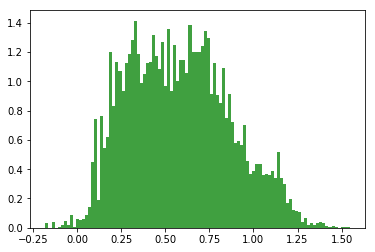

In [43]:
yhat_04 = results_04.predict(X_04);
plt.hist(yhat_04, 100, density=1, facecolor='green', alpha=0.75);

In [44]:
print(gof_range(yhat_04)[0])

Values under 0: 0.53%.
Values over 1: 8.87%.
Values fucked up: 9.39%.


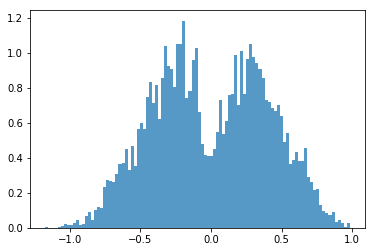

In [45]:
plt.hist(y-yhat_04, 100, density=1, alpha=0.75);

In [46]:
print(gof_pcp(yhat_04)[0])

Percent Correctly Predicted: 77.73%.


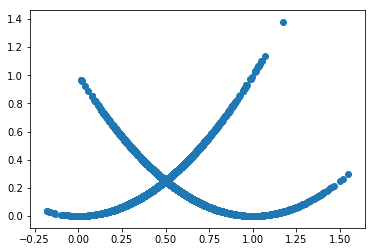

In [47]:
plt.scatter(yhat_04.values, (y.values - yhat_04.values)**2 );

In [48]:
results_sofar["04"] = [results_04.rsquared, results_04.rsquared_adj, gof_range(yhat_04)[1], gof_pcp(yhat_04)[1], len(yhat_04), len(list_col_04)]
results_sofar

00           01           02           03           04
R^2           0.232966     0.284113     0.286992     0.338736     0.338839
R^2 Adj.      0.229785     0.280492     0.282733     0.334786     0.334717
Out Range     0.039747     0.057556     0.059362     0.094335     0.093948
GoF           0.718544     0.746806     0.746290     0.776745     0.777262
n          7749.000000  7749.000000  7749.000000  7749.000000  7749.000000
variables    33.000000    40.000000    47.000000    47.000000    49.000000

<br>